<a href="https://colab.research.google.com/github/DonRoboto/Cursos/blob/master/Jorge_Calvillo_PerrosVsGatosTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clasificador de perros y gatos
En este ejercicio construirás un clasificador de imágenes de perros y gatos con redes neuronales convolucionales.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Librerías para uso de imágenes
import cv2

# Librerías para modelos de redes neuronales artificiales con keras
from keras.preprocessing import image as image_utils
from keras.models import Sequential, Model
from keras import backend
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import imutils

# Librerías para transferencia de conocimiento
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [0]:
# Con estas líneas de código podemos tener acceso a los documentos de nuestro Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


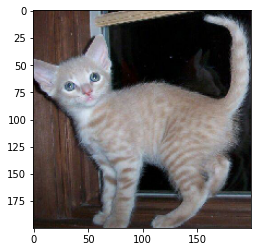

In [0]:
# Visualización de datos a trabajar.
# Es importante tener clara la ubicación de las imágenes
# La siguiente dirección considera que en tu Unidad de drive se encuentra una carpeta
# llamada PerrosGatos con las imágenes.

imagen = image_utils.load_img('drive/My Drive/PerrosGatos/104.jpg', 
                              target_size = (200,200))
plt.imshow(imagen, cmap='Accent')
plt.show()

In [0]:
# Con la siguiente instrucción convertimos una imagen a arreglo de numpy
imagen = image_utils.img_to_array(imagen)
imagen.shape

(200, 200, 3)

In [0]:
# Construicción del dataset a partir de las imágenes de la carpeta perros y gatos
# El dataset será un tensor de 4 dimensiones: 
# la 1° dimensión indica el numero de imagen,
# la 2° dimensión indica el ancho de la imagen,
# la 3° dimensión indica el alto de la imagen,
# la 4° dimensión indica el numero de canales que es 3 en el formato RGB.
# Primero creamos la variable dataset de dimensión (400,200,200,3) con valores 0

n_imagenes = 400
alto = 200
ancho = 200
canales = 3

dataset = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)


In [0]:
# Aquí actualizamos el dataset con la información de cada imagen
for i in range (n_imagenes):                                  # recuerda que la cuenta es de 0 a 399
  nombre = 'drive/My Drive/PerrosGatos/'+str(i+1)+'.jpg'      # construimos el nombre de la imagen
  img = image_utils.load_img(nombre, target_size = (200,200)) # con el nombre, leemos la imagen
  img = image_utils.img_to_array(img)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  # Preprocesamiento
  # Aquí normalizamos la imagen antes de almacenarla en el dataset
  img = np.expand_dims(img, axis = 0) # axis = 0 para meter las imagenes 
                                      # al modelo pre-entrenado resnet50 
  img = preprocess_input(img)         # con el preprocesameinto que se requiere  
                                      
  dataset[i] = img
  

In [0]:
# Lectura de las etiquetas
# La siguiente instrucción considera que el archivo "etiquetasPG.txt" se encuentra directamente en tu Unidad de drive
l = open('drive/My Drive/etiquetasPG.txt', 'r')         # Abrimos el archivo "etiquetasPG.txt"
etiquetas = list(map(lambda x:x[:-1], l.readlines()))   # Esta instrucción que parece "compleja" crea una lista llamada "etiquetas"
l.close()                                               # con las palabras que encuentra en el archivo "etiquetasPG.txt"
etiquetas

['perro',
 'perro',
 'perro',
 'perro',
 'gato',
 'gato',
 'gato',
 'gato',
 'gato',
 'gato',
 'gato',
 'perro',
 'gato',
 'gato',
 'gato',
 'gato',
 'perro',
 'perro',
 'gato',
 'gato',
 'perro',
 'gato',
 'perro',
 'perro',
 'gato',
 'perro',
 'perro',
 'gato',
 'gato',
 'perro',
 'perro',
 'gato',
 'perro',
 'gato',
 'gato',
 'gato',
 'gato',
 'gato',
 'perro',
 'gato',
 'perro',
 'perro',
 'perro',
 'perro',
 'gato',
 'perro',
 'gato',
 'perro',
 'perro',
 'gato',
 'gato',
 'gato',
 'gato',
 'gato',
 'gato',
 'perro',
 'perro',
 'gato',
 'perro',
 'gato',
 'gato',
 'perro',
 'gato',
 'gato',
 'perro',
 'perro',
 'perro',
 'gato',
 'perro',
 'perro',
 'perro',
 'perro',
 'perro',
 'perro',
 'gato',
 'perro',
 'perro',
 'perro',
 'perro',
 'gato',
 'gato',
 'gato',
 'perro',
 'gato',
 'perro',
 'perro',
 'perro',
 'perro',
 'gato',
 'gato',
 'gato',
 'gato',
 'gato',
 'perro',
 'perro',
 'gato',
 'perro',
 'perro',
 'gato',
 'gato',
 'gato',
 'perro',
 'gato',
 'gato',
 'perro',
 'pe

In [0]:
# Construimos el arreglo de los targets por clase (0,1)
# Esto lo hacemos para convertir las palabras "perro" o "gato" en 1 y 0
targets = np.zeros(len(etiquetas))    # Creamos un arreglo de ceros
for i in range (len(etiquetas)):      # Recorremos todas las etiquetas
  if (etiquetas[i]=='perro'):         # Si la etiqueta dice "perro"
    targets[i] = 1                    # asignamos un 1 a los targets
  else:                               # Si la etiqueta No dice "perro"
    targets[i] = 0                    # asignamos un 0 a los targets

In [0]:
# Aplicamos codificación 1-hot a las etiquetas
etiquetas2 = np_utils.to_categorical(targets) 
etiquetas2

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [0]:
# Dividimos los datos en entrenameinto y prueba
x_train, x_test, y_train, y_test = train_test_split(dataset, etiquetas2, 
                                                    test_size = 0.2)

In [0]:
# Estas son las dimensiones del conjunto de entrenamiento y el de prueba
print(x_train.shape)
print(x_test.shape)

(320, 200, 200, 3)
(80, 200, 200, 3)


## Diseño del modelo

La transferencia de conocimiento se realiza en 4 pasos:
1. Elegimos un modelo pre-entrenado que será el modelo base (ResNet50). 
2. De el modelo base conservamos los pesos de las capas convolucionales pero removemos las ultimas capas del modelo que son de tipo Dense.
3. Añadimos algunas capas Dense de acuerdo a nuestros requerimientos. En nuestro caso sumaremos dos capas Dense con dos neuronas en la ultima capa (modelo_intermedio).
4. Re-entrenamos nuestro modelo ajustando únicamente los pesos de las capas Dense que hemos añadido.



In [0]:
# Resetea la sesión para cambiar el modelo. 
# Así eliminamos información previa del modelo.
backend.clear_session()

In [0]:
# Creación del modelo con transferencia de conocimiento
modelo_base = ResNet50(weights = 'imagenet', include_top = False, 
                       input_shape = (alto, ancho, canales)) 
# Include_top se refiere a las capas dense
# Con False no las colocamos, con true colocarlas


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
# El siguiente proceso será para indicar a cada capa convolucional del modelo base
# que no será entrenada.
for layer in modelo_base.layers:
  layer.trainable = False   # así indicamos que estas capas no se vuelvan a entrenar

In [0]:
# Definición las últimas capas del modelo
modelo_intermedio = modelo_base.output
modelo_intermedio = Flatten()(modelo_intermedio) # que capa y a que modelo
modelo_intermedio = Dense(100, activation = 'relu', use_bias = True)(modelo_intermedio)
modelo_intermedio = Dense(2, activation = 'softmax', use_bias = True)(modelo_intermedio)

modelo_final = Model(inputs = modelo_base.input, outputs = modelo_intermedio)

In [0]:
modelo_final.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 100, 100, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
# Optimizador del modelo final
Adam = optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, 
                       epsilon = 1e-08, decay =0.0)
# Compilación del modelo final
modelo_final.compile (loss = 'categorical_crossentropy', optimizer=Adam, 
                      metrics = ['accuracy'])

In [0]:
# Definimos el ModelCheckpoint para poder almacenar los pesos de la red
# Recuerda que la extensión del archivo para los pesos debe ser .h5

checkpoint = ModelCheckpoint(filepath='pesos.h5', monitor='val_loss', 
                             verbose=1, mode = 'min', save_best_only=True) 

In [0]:
# Entrenamos el modelo
M = modelo_final.fit(x_train, y_train, epochs = 20, 
                     validation_data= (x_test, y_test), 
                     verbose=True, shuffle=True, batch_size=32, 
                     callbacks=[checkpoint]) #suffle es para datos aleatorios

Train on 320 samples, validate on 80 samples
Epoch 1/20
320/320 [==============================] - 4s 11ms/step - loss: 6.0849 - accuracy: 0.7000 - val_loss: 0.0341 - val_accuracy: 0.9875

Epoch 00001: val_loss improved from inf to 0.03405, saving model to pesos.h5
Epoch 2/20
320/320 [==============================] - 1s 3ms/step - loss: 0.2440 - accuracy: 0.9531 - val_loss: 0.0374 - val_accuracy: 0.9875

Epoch 00002: val_loss did not improve from 0.03405
Epoch 3/20
320/320 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.0014 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.03405 to 0.00140, saving model to pesos.h5
Epoch 4/20
320/320 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 0.9969 - val_loss: 0.0020 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00140
Epoch 5/20
320/320 [==============================] - 1s 3ms/step - loss: 1.5847e-04 - accuracy: 1.0000 - val_loss: 0.0082

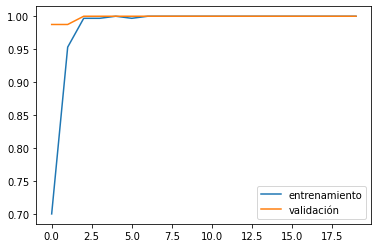

In [0]:
# Grafica la precisión del modelo (accuracy) 
plt.plot(M.history['accuracy'], label ='entrenamiento')
plt.plot(M.history['val_accuracy'], label ='validación')
plt.legend(loc='best')
#plt.ylim(0.98, 1) para establecer de donde a donde se desea graficar 
plt.show()

Para la siguiente prueba, sube alguna imagen de un perro o gato a colaboratory y reemplaza el nombre de la imagen en la función load_img

Prediccion = [[7.255939e-05 9.999274e-01]]
La imagen es de un perro


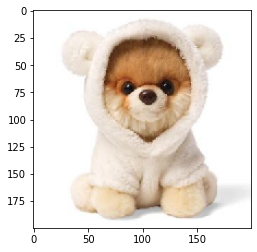

In [0]:
# Prueba del modelo sobre alguna imagen
prueba = image_utils.load_img('drive/My Drive/perro.jpg',
                         target_size = (200,200))
prueba = image_utils.img_to_array(prueba)
plt.imshow(image_utils.array_to_img(prueba), cmap = 'Accent')

# Predicción de la clase de la imagen 
clasificacion = modelo_final.predict(prueba.reshape(1,200,200,3))

print(f'Prediccion = {clasificacion}')

if (clasificacion[0,0]<0.5 and clasificacion[0,1]>=0.5):
  print ('La imagen es de un perro')
else:
  print('La imagen es de un gato')